LABORATORIO 4 - 20213704 - Hineill David Céspedes Espinoza

Se tiene una señal obtenida de un EMG (Electromiograma) con 1 activación muscular en el archivo
(EMG_raw.npy). Esta ha sido muestreada a 1 kHz y se encuentra contaminada con ruido de alta frecuencia

a) [Tarea asíncrona] Cargar la señal EMG y graficarla en el dominio del tiempo. Calcular la
transformada de Fourier y graficar la magnitud de la respuesta en frecuencia de la señal,
destacando el ruido a 60 Hz mediante líneas verticales (1 punto).

In [52]:
#-----------IMPORTAMOS LAS LIBRERÍAS
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Hineill\AppData\Local\Temp\ipykernel_31960\2109633090.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


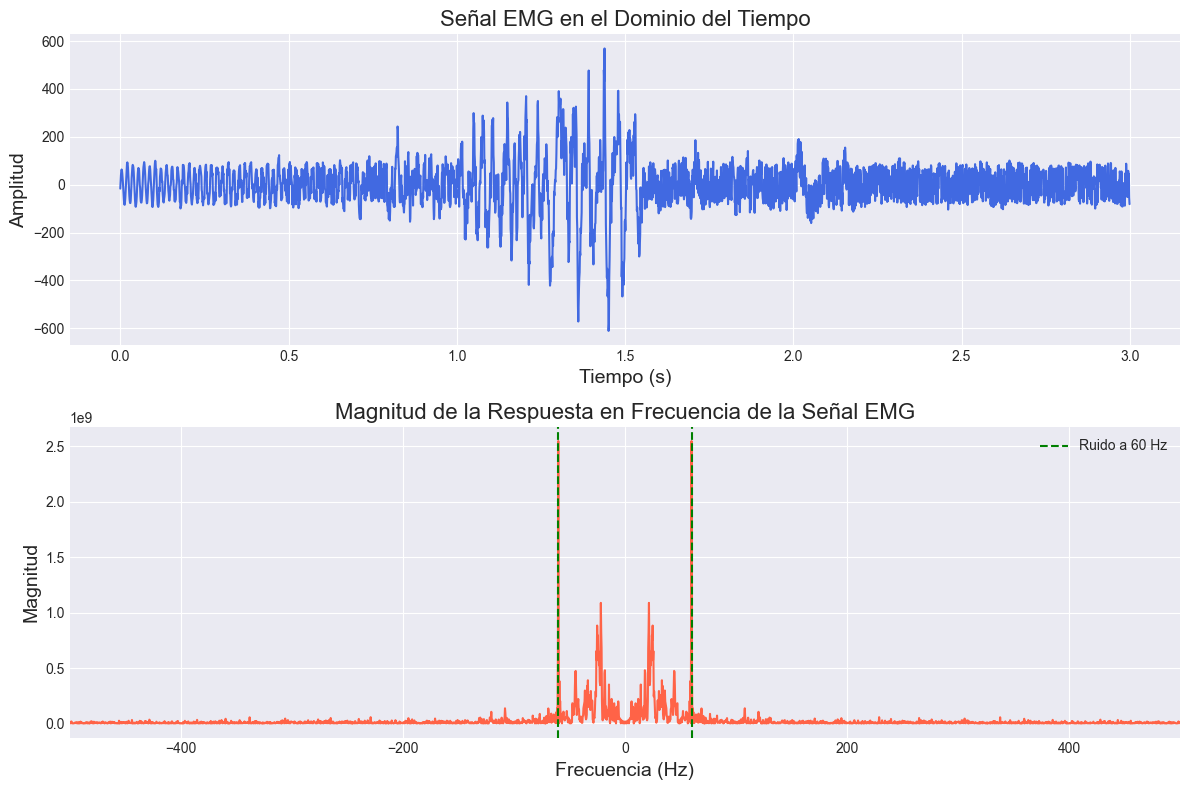

In [53]:
emg_signal = np.load("EMG_raw.npy")  
fs = 1000  
n_samples = len(emg_signal)
t = np.arange(n_samples) / fs

fft_emg_signal = np.fft.fftshift(np.fft.fft(emg_signal))
freq = (np.arange(n_samples) - n_samples/2) * fs / n_samples
magnitud_fft_emg_signal = np.abs(fft_emg_signal)**2
plt.style.use('seaborn-darkgrid')  
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(t, emg_signal, color='royalblue')
ax1.set_title('Señal EMG en el Dominio del Tiempo', fontsize=16)
ax1.set_xlabel('Tiempo (s)', fontsize=14)
ax1.set_ylabel('Amplitud', fontsize=14)
ax1.grid(True)
ax2.plot(freq, magnitud_fft_emg_signal, color='tomato')
ax2.axvline(60, color='green', linestyle='--', label='Ruido a 60 Hz')
ax2.axvline(-60, color='green', linestyle='--')
ax2.set_title('Magnitud de la Respuesta en Frecuencia de la Señal EMG', fontsize=16)
ax2.set_xlabel('Frecuencia (Hz)', fontsize=14)
ax2.set_ylabel('Magnitud', fontsize=14)
ax2.set_xlim(-fs/2, fs / 2)  
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

Comentario : Cargamos los datos del archivo . Podemos ver como la señal inicialmente parece tener la tendencia del electrocardiograma (como habitualmente , lo podemos ver) . Además , la componente de ruido si es notoria a 60Hz , ya que las lineas verdes indican la zona a 60Hz y el fondo anaranjado es como tal la magnitud del ruido interferente de la señal. 

b) [Tarea asíncrona] Diseñar un filtro FIR utilizando el método de ventanas con una ventana de
Hamming, con frecuencia de corte de 50 Hz y 33 coeficientes. Graficar la respuesta impulsiva, su
magnitud y fase de la respuesta en frecuencia para ambas ventanas, comparándolas con la
respuesta ideal (1 punto).

C:\Users\Hineill\AppData\Local\Temp\ipykernel_31960\1767709884.py:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(coeficiente_filtro_enventanado, use_line_collection=True, basefmt=" ")


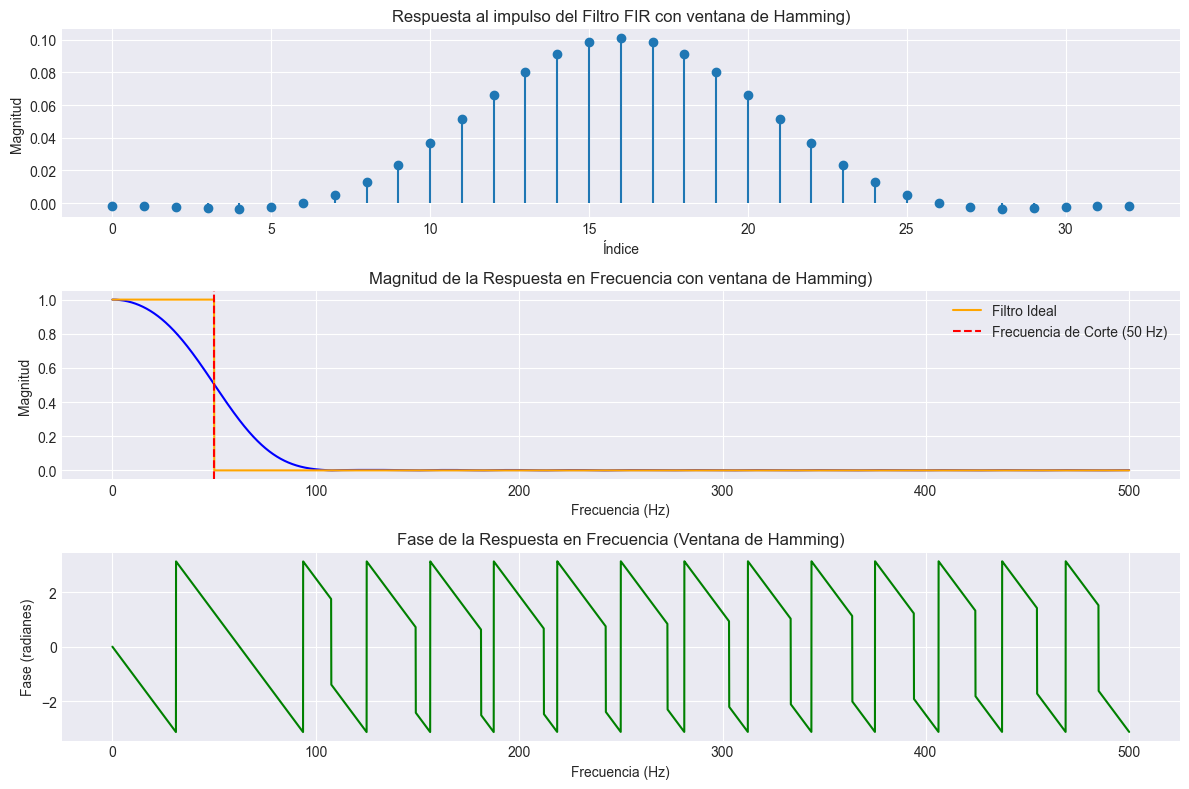

In [54]:
from scipy.signal import firwin, freqz
fs = 1000  
fc = 50   
# Diseño del filtro FIR con ventana de Hamming
#ASUMIMOS QUE LA FRECUENCIA DE MUESTREO DE LA SINC ES EL MISMO Q EL DE LA SEÑAL DEL ELECTROCARDIOGRAMA
coeficiente_filtro_enventanado = firwin(33, fc, fs=fs, window="hamming")
#CALCULAMOS LA RESPUESTA EN FRECUENCIA DEL FILTRO 
w, h = freqz(coeficiente_filtro_enventanado, worN=10000, fs=fs)
# Graficar la respuesta impulsiva del filtro
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(coeficiente_filtro_enventanado, use_line_collection=True, basefmt=" ")
plt.title("Respuesta al impulso del Filtro FIR con ventana de Hamming)")
plt.xlabel("Índice")
plt.ylabel("Magnitud")
# Graficar la magnitud de la respuesta en frecuencia
plt.subplot(3, 1, 2)
plt.plot(w, abs(h), color='blue')
plt.plot(w, np.where(w <= fc, 1, 0), color='orange', label="Filtro Ideal")  # +1e-10 para evitar log(0)
plt.title("Magnitud de la Respuesta en Frecuencia con ventana de Hamming)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.axvline(50, color='red', linestyle='--', label="Frecuencia de Corte (50 Hz)")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(w, np.angle(h), color='green')
plt.title("Fase de la Respuesta en Frecuencia (Ventana de Hamming)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.grid(True)
plt.tight_layout()
plt.show()

Comentario : 
Utilizamos funciones de la librería signal para obtener de manera rápida los resultados pedidos. Apartir de ello podemos notar la semejanza en el comportamiento del filtro respecto al filtro ideal . Sin embargo , esto a simple vista no parecería ser suficiente , pero a medida que la cantidad de componentes aumenta , existe un mayor parecido con la respuesta en frecuencia ideal , Como se muestra acontinuación.  

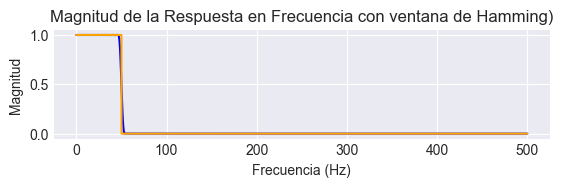

In [55]:
#EXTRA---- A MEDIDA Q AUMENTA LA CANTIDAD DE COMPONENTES , SE ASEMEJA MÁS A RESPUESTA IDEAL.
from scipy.signal import firwin, freqz
fs = 1000  
fc = 50   
coeficiente_filtro_enventanado = firwin(501, fc, fs=fs, window="hamming")
w, h = freqz(coeficiente_filtro_enventanado, worN=10000, fs=fs)
plt.subplot(3, 1, 2)
plt.plot(w, abs(h), color='blue')
plt.plot(w, np.where(w <= fc, 1, 0), color='orange', label="Filtro Ideal")  
plt.title("Magnitud de la Respuesta en Frecuencia con ventana de Hamming)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud ")
plt.grid(True)

Código usado para la sección teorica , para obtener las gráficas  

PREGUNTA 3 - TEORICA

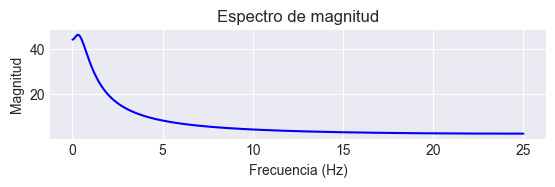

In [56]:
#PREGUNTA 3 , INCISO A 
Ts=0.02
n=np.arange(2000)
ola =  -5* ((np.exp(-3*Ts))**n) + 10* ((np.exp(-4*Ts))**n) #obtenido de forma teorica
w, h = freqz(ola, worN=10000, fs=1/Ts)
plt.subplot(3, 1, 2)
plt.plot(w, abs(h), color='blue')
plt.title("Espectro de magnitud")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.show()


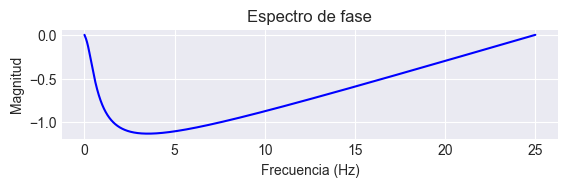

In [57]:
#Extra . la fase 
plt.subplot(3, 1, 2)
plt.plot(w, np.angle(h), color='blue')
plt.title("Espectro de fase")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.show()

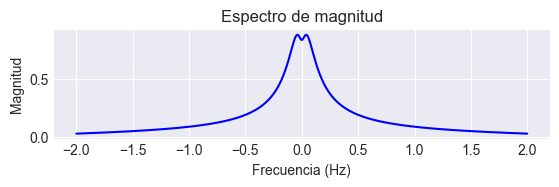

In [58]:
#PREGUNTA 3 , INCISO b
w = np.linspace(-2,2,1024)
ola = -5* ((1+ np.exp(1j*w))/( -97+ 103*np.exp(1j*w) )) +  10*((1+ np.exp(1j*w))/(104* np.exp(1j*w) - 96))
plt.subplot(3, 1, 2)
plt.plot(w, np.abs(ola), color='blue')
plt.title("Espectro de magnitud")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.show()

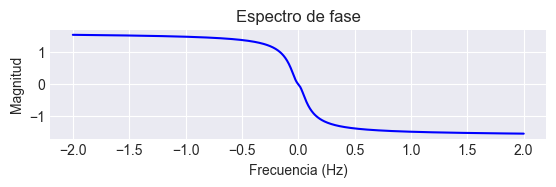

In [59]:
#Extra . la fase 
plt.subplot(3, 1, 2)
plt.plot(w, np.angle(ola), color='blue')
plt.title("Espectro de fase")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.show()

PREGUNTA - 2 -INCISO B  

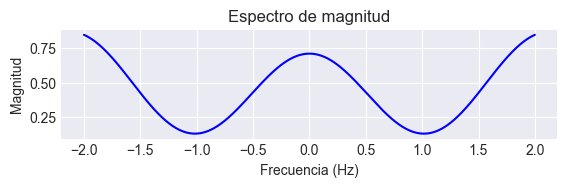

In [60]:
w = np.linspace(-2,2,1024)
ola = 1/2 + (1/np.pi)  * np.cos(3*w) - (1/(3*np.pi))  * np.cos(w)
plt.subplot(3, 1, 2)
plt.plot(w, np.abs(ola), color='blue')
plt.title("Espectro de magnitud")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.show()

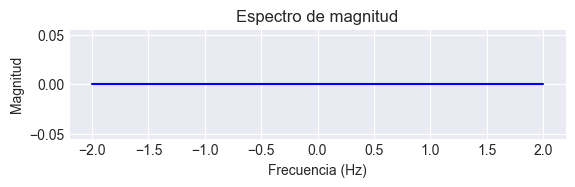

In [61]:
plt.subplot(3, 1, 2)
plt.plot(w, np.angle(ola), color='blue') #Es puramente real , no tiene fase
plt.title("Espectro de magnitud")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.show()